# Generate dataset

In [1]:
pip install opencv-contrib-python


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import os

In [9]:
def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    
    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)
        
        if faces is ():
            return None
        
        for (x, y, w, h) in faces:
            cropped_face = img[y:y+h, x:x+w]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    id = 1  # This is the user ID, which should be unique for each person
    img_id = 0  # This is the image ID
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id += 1
            face = cv2.resize(face_cropped(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "images/kajal." + str(id) + "." + str(img_id) + '.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
            cv2.imshow("Cropped_Face", face)
            
            if cv2.waitKey(1) == 13 or int(img_id) == 500:
                break
            
    cap.release()
    cv2.destroyAllWindows()
    print("Collecting samples is completed !!!")
    

# generate_dataset()

<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_4272/287845988.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move t

 # Train the Classifier

In [3]:
import numpy as np
from PIL import Image
import os
import cv2

In [4]:
def train_classifier(data_dir):
    path = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]
    faces = []
    ids = []
    
    for image in path:
        img = Image.open(image).convert('L')
        imageNp = np.array(img, 'uint8')
        id = int(os.path.split(image)[1].split(".")[1])
        
        faces.append(imageNp)
        ids.append(id)
    ids = np.array(ids)
    
    # Train the classifier and save
    clf = cv2.face.LBPHFaceRecognizer_create()
    clf.train(faces, ids)
    clf.write("classifier.xml")

# Call the function with the directory containing images
train_classifier("images")

Files found: ['Venkatesh.3.135.jpg', 'Simran.2.475.jpg', 'Venkatesh.3.186.jpg', 'Venkatesh.3.183.jpg', 'Venkatesh.3.355.jpg', 'Venkatesh.3.454.jpg', 'ViratKohli.4.485.jpg', 'KajalAgarwal.1.163.jpg', 'KajalAgarwal.1.438.jpg', 'KajalAgarwal.1.366.jpg', 'Simran.2.278.jpg', 'KajalAgarwal.1.355.jpg', 'ViratKohli.4.337.jpg', 'ViratKohli.4.451.jpg', 'KajalAgarwal.1.335.jpg', 'KajalAgarwal.1.498.jpg', 'ViratKohli.4.161.jpg', 'ViratKohli.4.379.jpg', 'Venkatesh.3.34.jpg', 'Simran.2.10.jpg', 'Venkatesh.3.448.jpg', 'ViratKohli.4.213.jpg', 'KajalAgarwal.1.67.jpg', 'Simran.2.22.jpg', 'KajalAgarwal.1.16.jpg', 'ViratKohli.4.399.jpg', 'Simran.2.284.jpg', 'Simran.2.430.jpg', 'KajalAgarwal.1.420.jpg', 'ViratKohli.4.428.jpg', 'Simran.2.444.jpg', 'KajalAgarwal.1.216.jpg', 'Simran.2.173.jpg', 'Venkatesh.3.316.jpg', 'KajalAgarwal.1.284.jpg', 'KajalAgarwal.1.91.jpg', 'KajalAgarwal.1.222.jpg', 'Simran.2.141.jpg', 'KajalAgarwal.1.381.jpg', 'Simran.2.480.jpg', 'Venkatesh.3.103.jpg', 'Simran.2.344.jpg', 'Venkates

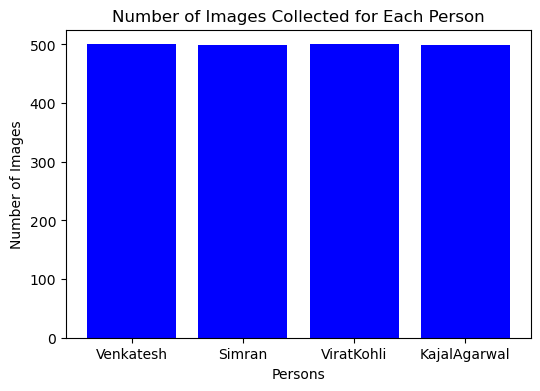

In [6]:
import matplotlib.pyplot as plt
import os

def generate_bar_graph(data_dir):
    files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
    print(f"Files found: {files}")

    users = {}
    for file in files:
        user_id = file.split('.')[0]
        if user_id in users:
            users[user_id] += 1
        else:
            users[user_id] = 1
    
    persons = list(users.keys())
    counts = list(users.values())
    
    print(f"Users and their image counts: {users}")
    
    if persons and counts:
        plt.figure(figsize=(6, 4))
        plt.bar(persons, counts, color='blue')
        plt.xlabel('Persons')
        plt.ylabel('Number of Images')
        plt.title('Number of Images Collected for Each Person')
        plt.show()
    else:
        print("No users or images found to display in the bar graph.")

# Generate bar graph
generate_bar_graph("images")


In [7]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np
import os
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def test_classifier(data_dir, clf, faceCascade):
    files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
    print(f"Files found for testing: {files}")

    true_labels = []
    predicted_labels = []
    for file in files:
        user_id = file.split('.')[1]
        true_labels.append(user_id)
        
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.1, 4)
        
        if len(faces) == 0:
            # No face detected, add a placeholder
            predicted_labels.append('unknown')
        else:
            # Take only one face per image for simplicity
            (x, y, w, h) = faces[0]
            id, _ = clf.predict(gray[y:y+h, x:x+w])
            predicted_labels.append(str(id))
    
    # Ensure the lengths of true_labels and predicted_labels match
    true_labels = true_labels[:len(predicted_labels)]
    predicted_labels = predicted_labels[:len(true_labels)]
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return true_labels, predicted_labels, accuracy

def generate_accuracy_pie_chart(true_labels, predicted_labels):
    correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    incorrect = len(true_labels) - correct
    
    labels = ['Correct', 'Incorrect']
    sizes = [correct, incorrect]
    colors = ['lightgreen', 'lightcoral']
    
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Accuracy of Face Recognition')
    plt.show()

# Load the classifier and face cascade
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
clf = cv2.face.LBPHFaceRecognizer_create()
clf.read("classifier.xml")

# Test the classifier and generate the accuracy pie chart
true_labels, predicted_labels, accuracy = test_classifier("images", clf, faceCascade)
generate_accuracy_pie_chart(true_labels, predicted_labels)


Files found for testing: ['Venkatesh.3.135.jpg', 'Simran.2.475.jpg', 'Venkatesh.3.186.jpg', 'Venkatesh.3.183.jpg', 'Venkatesh.3.355.jpg', 'Venkatesh.3.454.jpg', 'ViratKohli.4.485.jpg', 'KajalAgarwal.1.163.jpg', 'KajalAgarwal.1.438.jpg', 'KajalAgarwal.1.366.jpg', 'Simran.2.278.jpg', 'KajalAgarwal.1.355.jpg', 'ViratKohli.4.337.jpg', 'ViratKohli.4.451.jpg', 'KajalAgarwal.1.335.jpg', 'KajalAgarwal.1.498.jpg', 'ViratKohli.4.161.jpg', 'ViratKohli.4.379.jpg', 'Venkatesh.3.34.jpg', 'Simran.2.10.jpg', 'Venkatesh.3.448.jpg', 'ViratKohli.4.213.jpg', 'KajalAgarwal.1.67.jpg', 'Simran.2.22.jpg', 'KajalAgarwal.1.16.jpg', 'ViratKohli.4.399.jpg', 'Simran.2.284.jpg', 'Simran.2.430.jpg', 'KajalAgarwal.1.420.jpg', 'ViratKohli.4.428.jpg', 'Simran.2.444.jpg', 'KajalAgarwal.1.216.jpg', 'Simran.2.173.jpg', 'Venkatesh.3.316.jpg', 'KajalAgarwal.1.284.jpg', 'KajalAgarwal.1.91.jpg', 'KajalAgarwal.1.222.jpg', 'Simran.2.141.jpg', 'KajalAgarwal.1.381.jpg', 'Simran.2.480.jpg', 'Venkatesh.3.103.jpg', 'Simran.2.344.jpg

# Detect the face and recognitation

In [5]:
import cv2
import numpy as np
from PIL import Image
import os

In [6]:
def draw_boundary(img, classifier, scaleFactor, minNeighbors, color, tex, clf):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    features = classifier.detectMultiScale(gray_image, scaleFactor, minNeighbors)
    
    coords = []
    
    for(x,y,w,h) in features:
        cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
        id,pred = clf.predict(gray_image[y:y+h,x:x+w])
        confidence = int(100*(1-pred/300))
        
        if confidence>75:
            if id==1:
                cv2.putText(img,"KajalAgarwal",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,1,cv2.LINE_AA)
            if id==2:
                cv2.putText(img,"Simran",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,1,cv2.LINE_AA)
            if id==3:
                cv2.putText(img,"Venkatesh",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,1,cv2.LINE_AA)
            if id==4:
                cv2.putText(img,"ViratKohli",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,1,cv2.LINE_AA)
        else:
            cv2.putText(img,"UNKNOWN",(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),1,cv2.LINE_AA)
            
        coords = [x,y,w,h]
    return coords

def recognize(img,clf,faceCascade):
    coords = draw_boundary(img, faceCascade,1.1,10,(255,255,255),"Face",clf)
    return img


In [7]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
clf = cv2.face.LBPHFaceRecognizer_create()
clf.read("classifier.xml")

video_capture = cv2.VideoCapture(0)

while True:
    ret,img = video_capture.read()
    img = recognize(img,clf,faceCascade)
    cv2.imshow("face detection",img)
    
    if cv2.waitKey(1) & 0xFF == ord('q') or cv2.waitKey(1)==13:
        break
        
video_capture.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's thread (0x153e7780).
Cannot move to target thread (0x288d780)

QObject::moveToThread: Current thread (0x288d780) is not the object's